In [1]:
import numpy as np
import ipywidgets as widgets
from matplotlib import pyplot as plt
from IPython.display import display, HTML

from scipy.stats import multivariate_normal

from utils import *

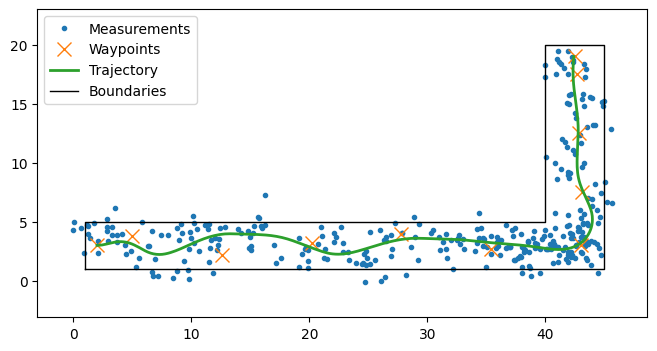

In [2]:
x_points, y_points, line_segments = track_example1()

trajectory = MPCTrajectory(x_points, y_points, line_segments, savepath="output/track_1_mvn.pkl")
states, measurements = trajectory.get_data()

trajectory.plot()

In [3]:
system = StateSpaceModel()

N = 20

parzen_particle_filter = PPF(system.f, system.h, system.F_jacobian, system.Q, system.R, N = N)
state_estimates, particle_history, particle_cov_history, weights_history = parzen_particle_filter.filter(measurements, verbose=True)
#state_estimates_smoothed, cov_estimates_smoothed = parzen_particle_filter.smoother(state_estimates, cov_estimates)

parzen_path = "animations/parzen_filter"
parzen_animation = PlotParzenAnimation(states, measurements, state_estimates, particle_history, particle_cov_history, name=parzen_path)

show_filter_animation(parzen_animation, parzen_path)

  0%|          | 0/337 [00:00<?, ?it/s]

  0%|          | 0/337 [00:00<?, ?it/s]

MovieWriter Pillow unavailable; using Pillow instead.


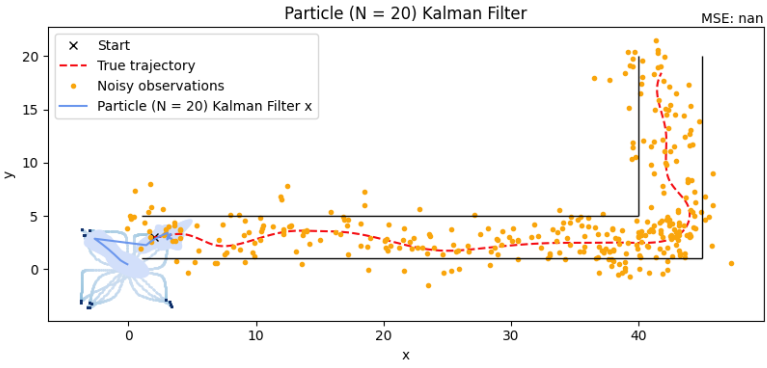

In [5]:
from IPython.display import Image, display

# Path to the PNG image file
image_path = 'animations/what_happens_when_you_dont_resample.png'

# Display the image
display(Image(filename=image_path))
